Author: Arend-Jan Quist\
Date created: 26 November 2021\
Last modified: 11 February 2022


In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

The multipliers of the output phase vector from the c-sieve are assumed to be binomial distributed with parameters $n=L-1$ and $p=\frac{1}{S}$.

In [2]:
# This function can be replaced by importing a phase vector (its multipliers) from a c-sieve simulation
def create_multipliers(n,p,S):
    """Create multipliers as simulation for a c-sieve output vector according to the binomial distribution""" 
    
    multipliers = np.random.binomial(n,p,S)# create random multipliers

    L_updated = np.sum(multipliers) # calculate length of obtained phase vector
    
    return (multipliers,L_updated)


def measure_counter_register(S,L,multipliers):
    """Find random output of measurement of first register of |I(j)> 's""" 
    
    x = np.random.randint(L)

    for i in range(S):
        res = x - multipliers[i]
        if (res >= 0):
            x = res
        else:
            break
    I_measured = x
    return I_measured


def create_punctured_phasevector(multipliers,I_measured):
    """Create the punctured phase vector based on the multipliers of the 
    original phase vector and the measured value of the counter register.
    """
    X = [multipliers>I_measured] 
    X_card = np.sum(X) # number of surviving indices
    X = np.nonzero(X[0])[0] # set of surviving indices
    return (X,X_card)

@jit(nopython=True)
def calculate_probability(S,X,X_card,theta):
    _sum = 0
    for b in X:
        #print(b)
        _sum += np.exp(2j*np.pi*b*theta)
    return abs(_sum)**2 / (X_card*S)


def calculate_probabilities(S,X,X_card,range_theta):
    probabilities = []
    
    for theta in range_theta:
        probabilities.append(calculate_probability(S,X,X_card, theta))
    return probabilities


def simulate(L,S,seed=20211126):
    """Simulate the post processing of option (1) averaged over measurements
    """
    
    np.random.seed(seed) # set seed to make things reproducible
    
    # parameters for random multipliers
    n = L-1
    p = 1/S
    
    # create phase vector as from c-sieve
    multipliers,L = create_multipliers(n,p,S)
    
    
    # apply post processing: first measure counter register, than measure the other register.
    
    n_q = 1  # number of values of q sampled
    range_q = np.linspace(0,1/(2*S),n_q)
    
    N_measurements = 1000  # number of times the state is measured
    
    probabilities = np.zeros([N_measurements,n_q])
    
    for i in range(N_measurements):
        I_measured = measure_counter_register(S,L,multipliers)
        X,X_card = create_punctured_phasevector(multipliers,I_measured)
        
        for j,q in enumerate(range_q):
            probabilities[i][j] = sum(calculate_probabilities(S,X,X_card,[q]))#,1/S-q,1/S+q,2/S-q]))
            
    return probabilities

In [3]:
# parameters

L = 5000 # length of phase vector
S = 500 # range of phase vector
N = 1000000  # group order -> not needed in this simulation
    
# parameters for random multipliers
n = L-1
p = 1/S

np.random.seed(20211126) # set seed to make things reproducible

import_phasevector = True

In [4]:
if import_phasevector:
    # import phase vector from file
    i=0 #number of run
    r=2 #arity
    infile = "Phasevectors/phasevector_"+str(L)+"_"+str(S)+"_"+str(N)+"_"+str(r)+"_"+str(i)+".npz"
    data=np.load(infile,allow_pickle=True)['data']
    multiplier_values = data[0]
    multipliers = np.histogram(multiplier_values,np.arange(-0.5,S+1 +0.5))[0]
    L = data[1]
    
else:
    # create phase vector as from c-sieve by simulation
    multipliers,L = create_multipliers(n,p,S)
    
print("L_realized =", L)
multipliers[0]

FileNotFoundError: [Errno 2] No such file or directory: 'Phasevectors/phasevector_5000_500_1000000_2_0.npz'

In [5]:
max(multiplier_values)

NameError: name 'multiplier_values' is not defined

In [6]:
# Simulation of the post processing


# apply post processing: first measure counter register, than measure the other register.

n_q = 1  # number of values of q sampled
range_q = np.linspace(0,1/(2*S),n_q)

N_measurements = 1000  # number of times the state is measured

probabilities = np.zeros([N_measurements,n_q])

for i in range(N_measurements):
    I_measured = measure_counter_register(S,L,multipliers)
    X,X_card = create_punctured_phasevector(multipliers,I_measured)
    
    for j,q in enumerate(range_q):
        probabilities[i][j] = sum(calculate_probabilities(S,X,X_card,[q]))#,1/S-q,1/S+q,2/S-q]))
print(np.average(probabilities,0))
print(np.average(probabilities))

[0.645148]
0.6451479999999999


In [7]:
np.average(simulate(2**10,2**10))

0.493625

In [28]:
S = 500
probabilities = []
range_L = np.logspace(5,18,30,base=2)
for L in range_L:
    probabilities.append(np.average(simulate(L,S)))
    

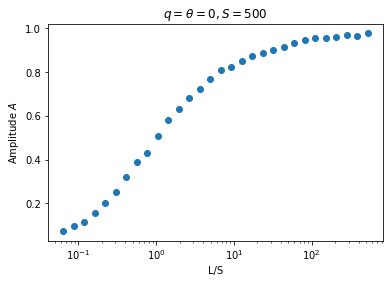

In [31]:
plt.plot(range_L[:]/S,probabilities[:],'o')
plt.semilogx()
#plt.semilogy()
plt.xlabel("L/S")
#plt.ylabel("Probability to find log(S) bits")
plt.ylabel(r"Amplitude $A$")
plt.title(r"$q=θ=0, S=500$")
plt.show()

array([0.])

262144.0


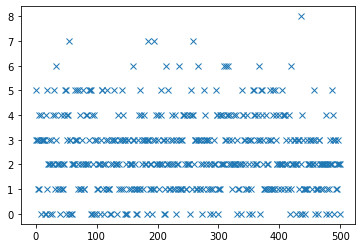

In [12]:
print(L)
plt.plot(multipliers,'x')

In [5]:
# DO NOT RUN THIS CELL!!!
# Wrong calculation: calculates value of the second register ;-(

# Find output of measurement of first register of |I(j)> 's

x = np.random.randint(L)

i=0
count=0
while(count<=x):
    count += multipliers[i]
    i += 1
I_measured = i-1  # measured value of the first register

In [133]:
I_measured,multipliers

(0,
 array([5, 3, 3, 3, 1, 1, 4, 3, 0, 4, 3, 3, 3, 3, 3, 0, 0, 4, 5, 1, 2, 3,
        2, 2, 0, 3, 0, 2, 4, 2, 5, 4, 1, 6, 3, 2, 1, 2, 2, 1, 0, 2, 4, 1,
        1, 2, 4, 2, 5, 0, 5, 3, 4, 4, 7, 0, 3, 3, 0, 2, 0, 2, 2, 2, 5, 3,
        3, 5, 3, 1, 2, 5, 4, 1, 2, 1, 3, 2, 5, 1, 1, 2, 2, 4, 4, 2, 2, 5,
        3, 5, 0, 5, 0, 4, 2, 0, 4, 3, 3, 0, 3, 1, 2, 1, 2, 0, 2, 3, 5, 5,
        1, 2, 0, 2, 2, 3, 1, 5, 3, 1, 1, 1, 0, 2, 0, 3, 3, 2, 5, 3, 3, 2,
        2, 2, 0, 4, 2, 1, 3, 3, 1, 3, 5, 1, 4, 3, 0, 3, 0, 2, 0, 3, 3, 1,
        2, 2, 2, 1, 2, 6, 3, 3, 1, 2, 1, 0, 1, 0, 3, 4, 1, 5, 1, 4, 2, 3,
        1, 3, 4, 3, 2, 2, 3, 0, 3, 7, 3, 1, 2, 1, 2, 0, 1, 3, 7, 1, 3, 4,
        2, 2, 3, 4, 2, 1, 2, 4, 5, 2, 2, 3, 3, 0, 0, 1, 6, 3, 2, 2, 5, 1,
        1, 2, 3, 2, 4, 1, 3, 2, 1, 4, 0, 3, 2, 2, 1, 6, 3, 1, 1, 3, 3, 1,
        4, 4, 4, 2, 1, 1, 4, 2, 2, 2, 2, 0, 4, 5, 1, 4, 4, 7, 2, 3, 3, 3,
        1, 1, 6, 3, 3, 1, 1, 2, 3, 0, 1, 2, 5, 3, 4, 3, 2, 3, 3, 1, 2, 3,
        0, 1, 2, 1, 1, 0, 3, 2, 2,

In [13]:
if (I_measured < min(multipliers)):
    print("success!")
else:
    print("no success")
    



no success


3319

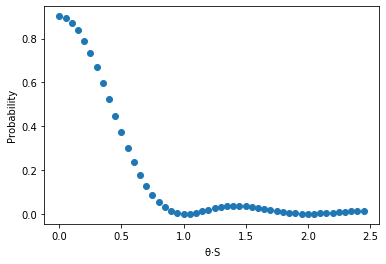

In [19]:
delta = 0.05

_range = np.arange(0,2.5/S,delta/S)
probabilities = []

for theta in _range:
    probabilities.append(calculate_probability(S,X,X_card, theta))
    #print(theta,"done.")
    
plt.plot(_range*S,probabilities,'o')
plt.xlabel(' θ$\cdot$S ')
plt.ylabel("Probability")
plt.show()

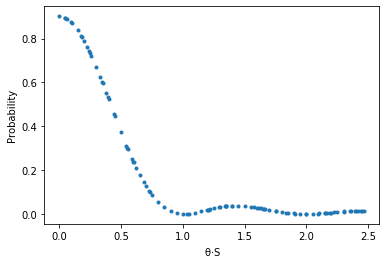

In [15]:
# add random values of theta to the probability calculation
m = 50  # number of added uniform values of theta
rnd_thetas = np.random.uniform(0,2.5/S,m)
    
delta = 0.05

_range = np.arange(0,2.5/S,delta/S)
_range = np.append(_range,rnd_thetas)
probabilities = []

for theta in _range:
    probabilities.append(calculate_probability(S,X,X_card, theta))
    #print(theta,"done.")
    
plt.plot(_range*S,probabilities,'.')
plt.xlabel(' θ$\cdot$S ')
plt.ylabel("Probability")
plt.show()


Define $q=\left|\frac{s}{N}S - \left\lceil\frac{s}{N}S\right\rfloor\right|$. 

Probability to learn log(S) resp. log(S)-1 bits of s

q =  0.0 	 0.902 	 0.9029727700381798
q =  0.05 	 0.8947308596241714 	 0.900721575953775
q =  0.1 	 0.8732054795417439 	 0.8944210161521834
q =  0.15 	 0.8382552640304205 	 0.8847740088777536
q =  0.2 	 0.7912177186053696 	 0.8727718001021872
q =  0.25 	 0.7338672689385287 	 0.8596014363708558
q =  0.3 	 0.6683243394203282 	 0.8465372685324873
q =  0.35 	 0.5969481472546199 	 0.8348259403722579
q =  0.4 	 0.5222195845618325 	 0.8255748006997145
q =  0.45 	 0.44662105934119856 	 0.8196533301482354
q =  0.5 	 0.37252021802160523 	 0.8176160253598529


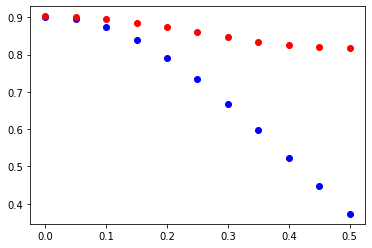

In [16]:
print("Probability to learn log(S) resp. log(S)-1 bits of s\n")

for q in np.arange(0,0.5/delta+1,0.05/delta):
    print("q = ",np.round(q*delta,3),"\t",
          probabilities[int(q)],"\t",
          probabilities[int(q)]
          + probabilities[int(1/delta - q)] 
          + probabilities[int(1/delta + q)] 
          + probabilities[int(2/delta - q)]
         )
    plt.plot(np.round(q*delta,3),probabilities[int(q)],'bo')
    plt.plot(np.round(q*delta,3),
             probabilities[int(q)]
             + probabilities[int(1/delta - q)] 
             + probabilities[int(1/delta + q)]
             + probabilities[int(2/delta - q)],'ro')

In [17]:
from scipy.optimize import curve_fit

def sinc(x, A, a):
    return A*np.sinc(a*x)**2
    #pi = np.pi
    #return (A*np.sin(a*pi*x)/(a*pi*x))**2

Fit parameters: [0.90163943 0.99042431]
Probability[0]: 0.902


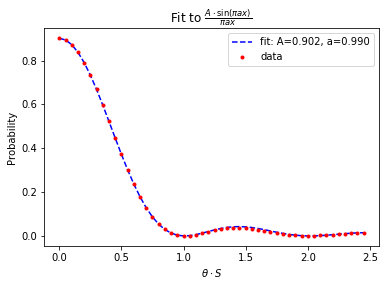

In [26]:
# fit sinc function to probability vs theta plot

xdata=_range*S
ydata=probabilities

popt, pcov = curve_fit(sinc, xdata, ydata,bounds=[0,[2,5]])
print("Fit parameters:",popt)
print("Probability[0]:",probabilities[0])
plt.plot(xdata, sinc(xdata, *popt), 'b--',
         label='fit: A=%5.3f, a=%5.3f' % tuple(popt))
#plt.plot(xdata, sinc(xdata, probabilities[0], 1), 'g--',
#         label='fit: A=probability(0), a=1')
plt.plot(xdata,ydata,'r.',label='data')
plt.xlabel(r"$\theta\cdot S$")
plt.ylabel("Probability")
plt.title(r"Fit to $\frac{A \cdot \sin(\pi a x)}{\pi a x}$")
plt.legend()
plt.show()